**IMPORT NECESSARY PYTHON LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATASET LOADING AND CLEANING**

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check column for empty string or empty space.
for col in df.columns:
    if df[col].dtype == 'object':
        has_empty = df[col].str.strip().eq("").any()
        if has_empty:
            print(f"Column '{col}' contains empty or blank strings.")


Column 'TotalCharges' contains empty or blank strings.


In [ ]:
# replace empty string with 0
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# checking for null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#converted 0 and 1 values of senior citizen to Yes/No.
def conv(value):
  if value == 0:
    return "Yes"
  else:
    return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6587,7426-GSWPO,Male,No,No,No,64,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.50,6548.65,No
4159,6917-YACBP,Female,No,No,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,89.75,5496.90,No
1481,9242-TKFSV,Male,Yes,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),65.10,4754.30,No
4346,9351-LZYGF,Female,Yes,Yes,No,42,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),66.40,2727.80,No
6425,9746-YKGXB,Male,Yes,Yes,Yes,52,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,One year,No,Bank transfer (automatic),44.25,2276.10,No


**EXPLORATORY DATA ANALYSIS(EDA)**

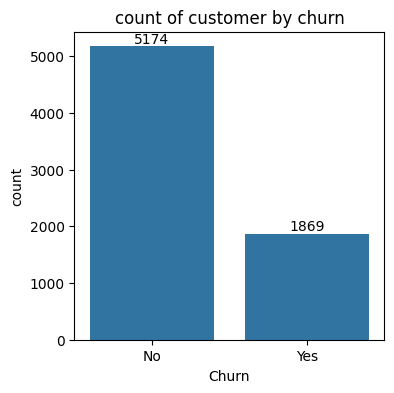

In [ ]:
# EDA of univariate analysis of categorical variable.
plt.figure(figsize = (4,4))
ax = sns.countplot(x= 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

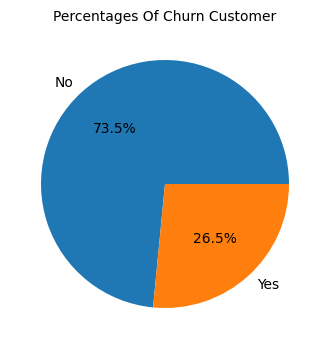

In [ ]:
#create pie chart of percentage of churn customer
plt.figure(figsize = (4,5))
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].value_counts().index, autopct = '%1.1f%%')
plt.title('Percentages Of Churn Customer', fontsize = 10)
plt.show()

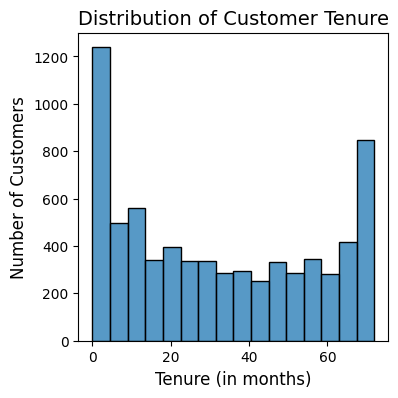

In [ ]:
# univariate analysis of numerical variable.
plt.figure(figsize = (4,4))
sns.histplot(df['tenure'])
plt.title("Distribution of Customer Tenure", fontsize=14)
plt.xlabel("Tenure (in months)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

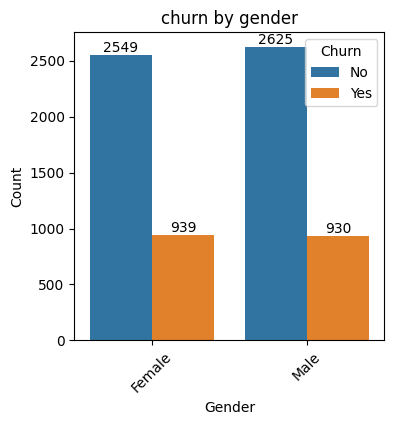

In [ ]:
# Bivariate analysis
plt.figure(figsize = (4,4))
ax = sns.countplot(x= 'gender', hue = 'Churn',data = df)
for container in ax.containers:
  ax.bar_label(container)
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("churn by gender")
plt.show()

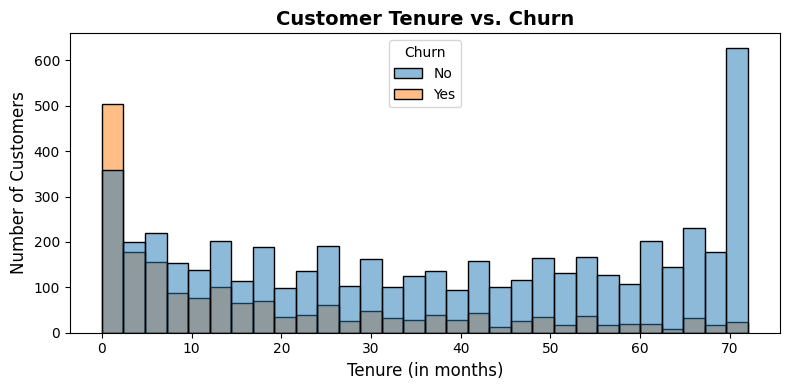

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(x= 'tenure', bins = 30, hue = 'Churn', data = df)
plt.title("Customer Tenure vs. Churn", fontsize=14, fontweight='bold')
plt.xlabel("Tenure (in months)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()

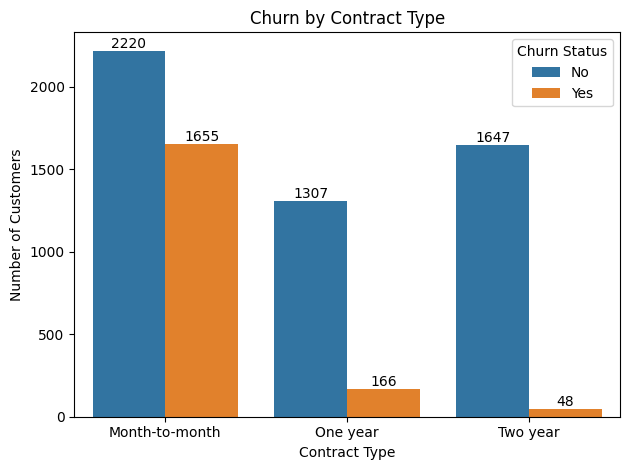

In [ ]:
# bivariate analysis
ax = sns.countplot(x= df['Contract'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

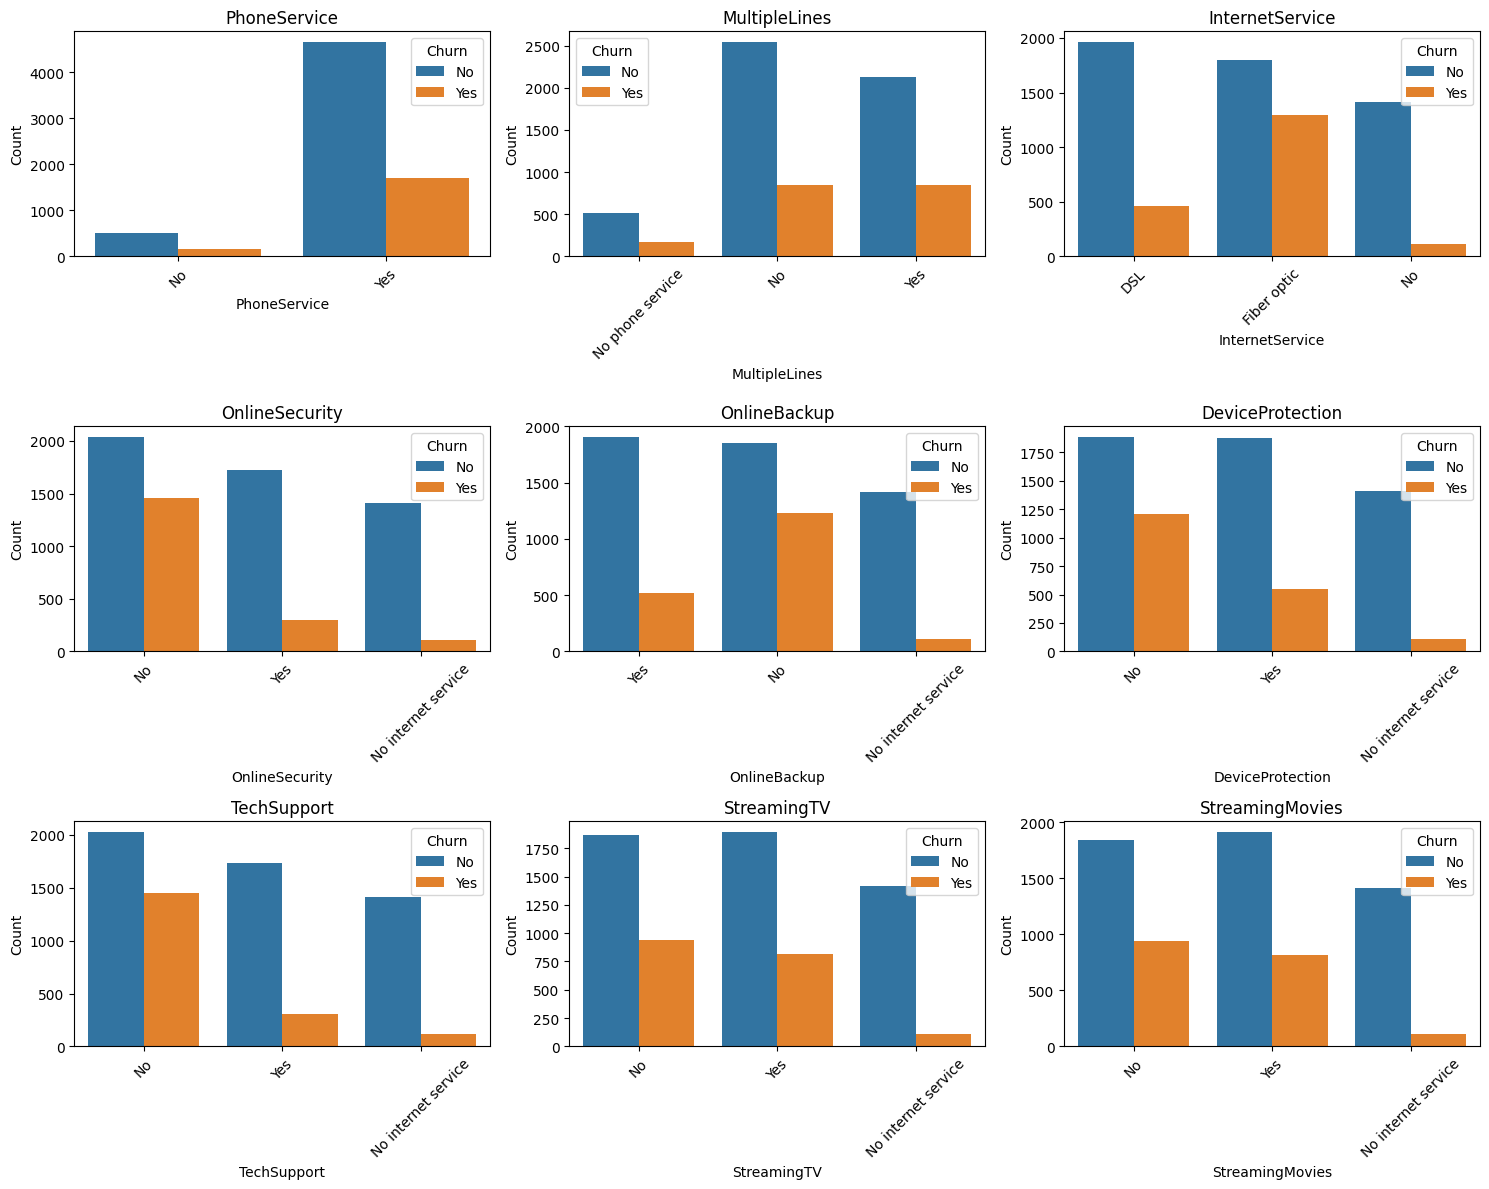

In [ ]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(cols)+n_cols-1)// n_cols
fig,axes = plt.subplots(n_rows,n_cols,figsize= (15,12))
axes = axes.flatten()
for i, col in enumerate(cols):
  sns.countplot(x =col, ax = axes[i], hue = 'Churn', data = df)
  axes[i].set_title(col)
  axes[i].set_ylabel("Count")
  axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

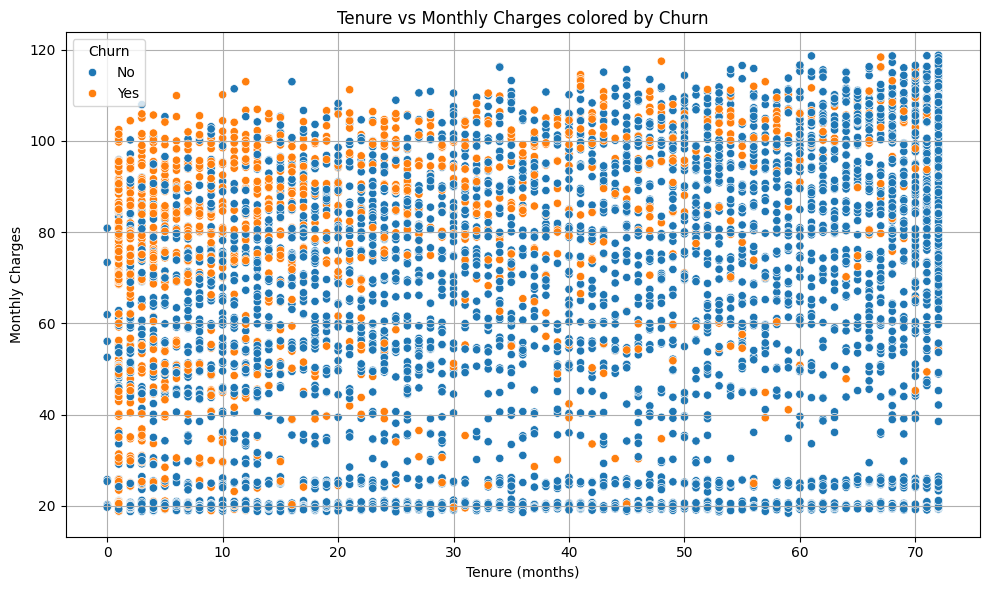

In [ ]:
# multivariate analysis of monthly charges vs tenure, color by churn
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn',data=df)
plt.title("Tenure vs Monthly Charges colored by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Charges")
plt.grid(True)
plt.tight_layout()
plt.show()

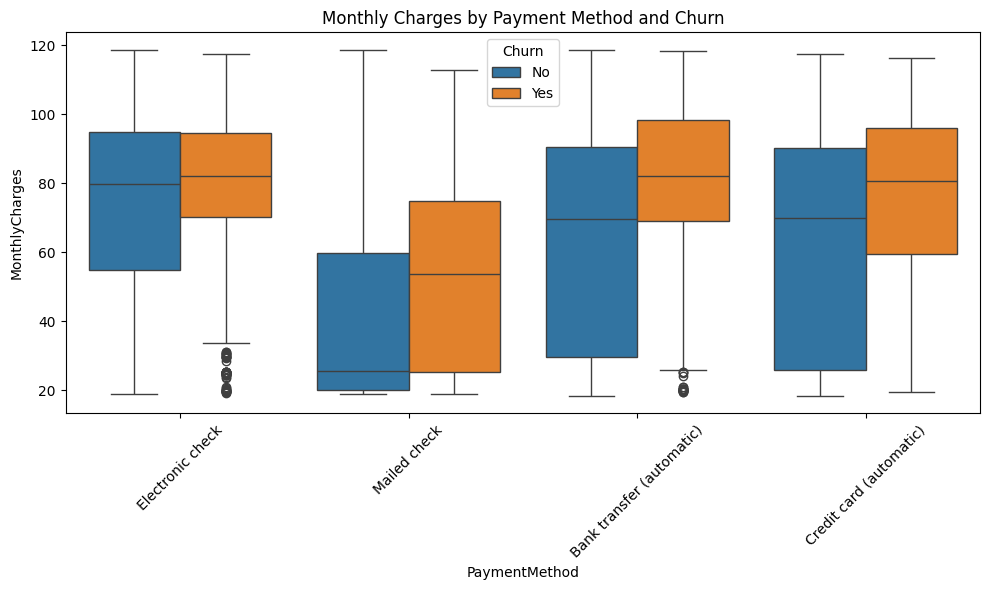

In [ ]:
# multivariate analysis : monthly charges by payment method and churn
plt.figure(figsize=(10,6))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Monthly Charges by Payment Method and Churn")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

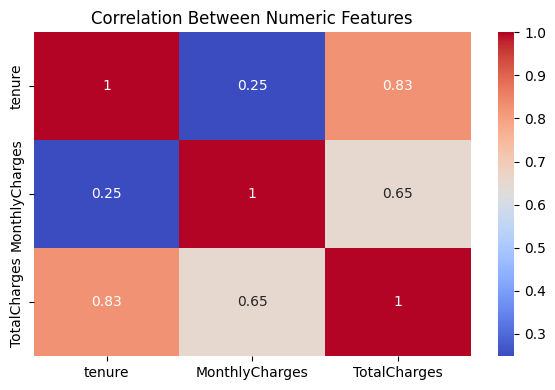

In [ ]:
# heatmap of corelation between numeric features
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()
